# SCEC/USGS Dynamic Rupture Benchmarks TPV36 and TPV37: Shallow Dip Thrust Fault

Please see https://strike.scec.org/cvws/tpv36_37docs.html for details.

For information how to read tables from PDF, please see:
- https://geekyhumans.com/how-to-extract-text-and-images-from-pdf-using-python
- https://github.com/chezou/tabula-py

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 22 on-fault receivers (ParaView)

In [2]:
# 22 on-fault stations - formatting help from ChatGPT
data = {
    "Station name": [
        "faultst000dp000", "faultst000dp010", "faultst000dp030", "faultst000dp060", 
        "faultst000dp120", "faultst000dp180", "faultst000dp240", "faultst040dp000", 
        "faultst040dp030", "faultst040dp060", "faultst040dp120", "faultst040dp180", 
        "faultst080dp000", "faultst080dp030", "faultst080dp060", "faultst080dp120", 
        "faultst080dp180", "faultst120dp000", "faultst120dp030", "faultst120dp060", 
        "faultst120dp120", "faultst120dp180"
    ],
    "Description": [
        "On fault, 0.0 km along strike, 0.0 km down-dip.", 
        "On fault, 0.0 km along strike, 1.0 km down-dip.", 
        "On fault, 0.0 km along strike, 3.0 km down-dip.", 
        "On fault, 0.0 km along strike, 6.0 km down-dip.", 
        "On fault, 0.0 km along strike, 12.0 km down-dip.", 
        "On fault, 0.0 km along strike, 18.0 km down-dip.", 
        "On fault, 0.0 km along strike, 24.0 km down-dip.", 
        "On fault, 4.0 km along strike, 0.0 km down-dip.", 
        "On fault, 4.0 km along strike, 3.0 km down-dip.", 
        "On fault, 4.0 km along strike, 6.0 km down-dip.", 
        "On fault, 4.0 km along strike, 12.0 km down-dip.", 
        "On fault, 4.0 km along strike, 18.0 km down-dip.", 
        "On fault, 8.0 km along strike, 0.0 km down-dip.", 
        "On fault, 8.0 km along strike, 3.0 km down-dip.", 
        "On fault, 8.0 km along strike, 6.0 km down-dip.", 
        "On fault, 8.0 km along strike, 12.0 km down-dip.", 
        "On fault, 8.0 km along strike, 18.0 km down-dip.", 
        "On fault, 12.0 km along strike, 0.0 km down-dip.", 
        "On fault, 12.0 km along strike, 3.0 km down-dip.", 
        "On fault, 12.0 km along strike, 6.0 km down-dip.", 
        "On fault, 12.0 km along strike, 12.0 km down-dip.", 
        "On fault, 12.0 km along strike, 18.0 km down-dip."
    ]
}

# Coordinates corresponding to each station
coordinates = [
    (0.0, 0.0), (0.0, 1.0), (0.0, 3.0), (0.0, 6.0), (0.0, 12.0), (0.0, 18.0), (0.0, 24.0),
    (4.0, 0.0), (4.0, 3.0), (4.0, 6.0), (4.0, 12.0), (4.0, 18.0),
    (8.0, 0.0), (8.0, 3.0), (8.0, 6.0), (8.0, 12.0), (8.0, 18.0), 
    (12.0, 0.0), (12.0, 3.0), (12.0, 6.0), (12.0, 12.0), (12.0, 18.0)
]

# Create the DataFrame
df_onfault = pd.DataFrame(data)

# Add x and w (distance down-dip) columns
df_onfault["x [m]"] = [coord[0] for coord in coordinates] # along-strike
df_onfault["w [m]"] = [coord[1] for coord in coordinates] # down-dip
# including conversions to meters
df_onfault["x [m]"] *= 1e3
df_onfault["w [m]"] *= 1e3

In [3]:
df_onfault["z [m]"] = df_onfault["w [m]"] * np.sin(15*np.pi / 180) * -1 # depth -> negative in SeisSol
df_onfault["y [m]"] = df_onfault["z [m]"] / np.tan(15*np.pi / 180) * -1 # normal to strike -> positive in North-direction
df_onfault = df_onfault.loc[:,["Station name","Description","x [m]","y [m]","z [m]","w [m]"]] # re-order columns
df_onfault

,Station name,Description,x [m],y [m],z [m],w [m]
0,faultst000dp000,"On fault, 0.0 km along strike, 0.0 km down-dip.",0.0,0.000000,-0.000000,0.0
1,faultst000dp010,"On fault, 0.0 km along strike, 1.0 km down-dip.",0.0,965.925826,-258.819045,1000.0
2,faultst000dp030,"On fault, 0.0 km along strike, 3.0 km down-dip.",0.0,2897.777479,-776.457135,3000.0
3,faultst000dp060,"On fault, 0.0 km along strike, 6.0 km down-dip.",0.0,5795.554958,-1552.914271,6000.0
4,faultst000dp120,"On fault, 0.0 km along strike, 12.0 km down-dip.",0.0,11591.109915,-3105.828541,12000.0
5,faultst000dp180,"On fault, 0.0 km along strike, 18.0 km down-dip.",0.0,17386.664873,-4658.742812,18000.0
6,faultst000dp240,"On fault, 0.0 km along strike, 24.0 km down-dip.",0.0,23182.219831,-6211.657082,24000.0
7,faultst040dp000,"On fault, 4.0 km along strike, 0.0 km down-dip.",4000.0,0.000000,-0.000000,0.0
8,faultst040dp030,"On fault, 4.0 km along strike, 3.0 km down-dip.",4000.0,2897.777479,-776.457135,3000.0
9,faultst040dp060,"On fault, 4.0 km along strike, 6.0 km down-dip.",4000.0,5795.554958,-1552.914271,6000.0


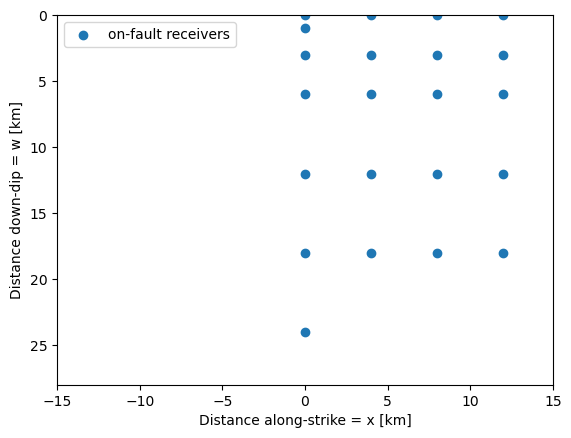

In [4]:
plt.scatter(df_onfault["x [m]"]/1e3, df_onfault["w [m]"]/1e3, label="on-fault receivers")
plt.xlim(-15,15)
plt.ylim(28,0)
plt.xlabel("Distance along-strike = x [km]")
plt.ylabel("Distance down-dip = w [km]")
plt.legend(loc="upper left")
plt.savefig("receivers_on-fault.png", dpi=300)

In [5]:
df_onfault.to_csv("stations_onfault.csv", index=False)

## 22 off-fault receivers (ParaView)

In [6]:
# 22 stations at the earth's surface - formatting help from ChatGPT
# Station names and locations
stations = [
    ("body-090st000dp000", "−9.0 km off fault (near side), 0.0 km along strike, 0 km depth."),
    ("body-090st100dp000", "−9.0 km off fault (near side), 10.0 km along strike, 0 km depth."),
    ("body-090st200dp000", "−9.0 km off fault (near side), 20.0 km along strike, 0 km depth."),
    ("body-030st000dp000", "−3.0 km off fault (near side), 0.0 km along strike, 0 km depth."),
    ("body-010st000dp000", "−1.0 km off fault (near side), 0.0 km along strike, 0 km depth."),
    ("body-010st100dp000", "−1.0 km off fault (near side), 10.0 km along strike, 0 km depth."),
    ("body010st000dp000", "1.0 km off fault (far side), 0.0 km along strike, 0 km depth."),
    ("body010st010dp000", "1.0 km off fault (far side), 10.0 km along strike, 0 km depth."),
    ("body030st000dp000", "3.0 km off fault (far side), 0.0 km along strike, 0 km depth."),
    ("body090st000dp000", "9.0 km off fault (far side), 0.0 km along strike, 0 km depth."),
    ("body090st100dp000", "9.0 km off fault (far side), 10.0 km along strike, 0 km depth."),
    ("body090st200dp000", "9.0 km off fault (far side), 20.0 km along strike, 0 km depth."),
    ("body150st000dp000", "15.0 km off fault (far side), 0.0 km along strike, 0 km depth."),
    ("body210st000dp000", "21.0 km off fault (far side), 0.0 km along strike, 0 km depth."),
    ("body270st000dp000", "27.0 km off fault (far side), 0.0 km along strike, 0 km depth."),
    ("body270st100dp000", "27.0 km off fault (far side), 10.0 km along strike, 0 km depth."),
    ("body270st200dp000", "27.0 km off fault (far side), 20.0 km along strike, 0 km depth."),
    ("body330st000dp000", "33.0 km off fault (far side), 0.0 km along strike, 0 km depth."),
    ("body390st000dp000", "39.0 km off fault (far side), 0.0 km along strike, 0 km depth."),
    ("body450st000dp000", "45.0 km off fault (far side), 0.0 km along strike, 0 km depth."),
    ("body450st100dp000", "45.0 km off fault (far side), 10.0 km along strike, 0 km depth."),
    ("body450st200dp000", "45.0 km off fault (far side), 20.0 km along strike, 0 km depth.")
]

# Coordinates
coordinates = [
    (0.0, -9.0), (10.0, -9.0), (20.0, -9.0), 
    (0.0, -3.0), 
    (0.0, -1.0), (10.0, -1.0),
    (0.0, 1.0), (10.0, 1.0),
    (0.0, 3.0),
    (0.0, 9.0), (10.0, 9.0), (20.0, 9.0),
    (0.0, 15.0), 
    (0.0, 21.0), 
    (0.0, 27.0), (10.0, 27.0), (20.0, 27.0),
    (0.0, 33.0), 
    (0.0, 39.0), 
    (0.0, 45.0), (10.0, 45.0), (20.0, 45.0)
]

In [7]:
# Create the dataframe
df_offfault = pd.DataFrame(stations, columns=["Station name", "Description"])

# Add x and y columns
df_offfault["x [m]"] = [coord[0] for coord in coordinates]
df_offfault["y [m]"] = [coord[1] for coord in coordinates]
df_offfault["x [m]"] *= 1e3
df_offfault["y [m]"] *= 1e3
df_offfault["z [m]"] = 0.0

In [8]:
df_offfault

,Station name,Description,x [m],y [m],z [m]
0,body-090st000dp000,"−9.0 km off fault (near side), 0.0 km along st...",0.0,-9000.0,0.0
1,body-090st100dp000,"−9.0 km off fault (near side), 10.0 km along s...",10000.0,-9000.0,0.0
2,body-090st200dp000,"−9.0 km off fault (near side), 20.0 km along s...",20000.0,-9000.0,0.0
3,body-030st000dp000,"−3.0 km off fault (near side), 0.0 km along st...",0.0,-3000.0,0.0
4,body-010st000dp000,"−1.0 km off fault (near side), 0.0 km along st...",0.0,-1000.0,0.0
5,body-010st100dp000,"−1.0 km off fault (near side), 10.0 km along s...",10000.0,-1000.0,0.0
6,body010st000dp000,"1.0 km off fault (far side), 0.0 km along stri...",0.0,1000.0,0.0
7,body010st010dp000,"1.0 km off fault (far side), 10.0 km along str...",10000.0,1000.0,0.0
8,body030st000dp000,"3.0 km off fault (far side), 0.0 km along stri...",0.0,3000.0,0.0
9,body090st000dp000,"9.0 km off fault (far side), 0.0 km along stri...",0.0,9000.0,0.0


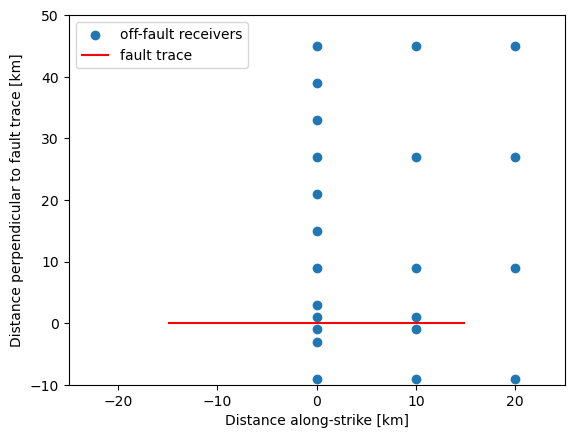

In [9]:
plt.scatter(df_offfault["x [m]"]/1e3, df_offfault["y [m]"]/1e3, label="off-fault receivers")
plt.xlim(-25,25)
plt.ylim(-10,50)
plt.xlabel("Distance along-strike [km]")
plt.ylabel("Distance perpendicular to fault trace [km]")
plt.hlines(0, -15, 15, colors="red", linestyles="solid", label="fault trace"),
plt.legend(loc="upper left")
plt.savefig("receivers_off-fault.png", dpi=300)

In [10]:
df_offfault.to_csv("stations_offfault.csv", index=False)

## Prepare final SeisSol receivers

In [11]:
#df = pd.merge(df_onfault, df_offfault, how="outer")

In [12]:
df_onfault.to_csv("onfault_receivers.dat", index=False, header=False, sep=" ", columns=["x [m]", "y [m]", "z [m]"])
df_offfault.to_csv("offfault_receivers.dat", index=False, header=False, sep=" ", columns=["x [m]", "y [m]", "z [m]"])